In [1]:
#importing python modules/libraries
import pandas as panda
import numpy as nump
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

Importing Dataset .csv file

In [2]:
dataset=panda.read_csv("../input/who_suicide_statistics.csv")
dataset.head(10)

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0
5,Albania,1985,female,75+ years,NaN,34200.0
6,Albania,1985,male,15-24 years,NaN,301400.0
7,Albania,1985,male,25-34 years,NaN,264200.0
8,Albania,1985,male,35-54 years,NaN,296700.0
9,Albania,1985,male,5-14 years,NaN,325800.0


In [3]:
#finding total number of null values in attributes of dataset
print(dataset.isnull().sum())

country           0
year              0
sex               0
age               0
suicides_no    2256
population     5460
dtype: int64


In [4]:
print(dataset.count())

country        43776
year           43776
sex            43776
age            43776
suicides_no    41520
population     38316
dtype: int64


In [5]:

#removing null value rows from dataset and again checking number of null rows in dataset
dataset.dropna(inplace=True)
print(dataset.isnull().sum())

country        0
year           0
sex            0
age            0
suicides_no    0
population     0
dtype: int64


In [6]:
print(dataset.head(10))
print(dataset.count())

    country  year     sex          age  suicides_no  population
24  Albania  1987  female  15-24 years         14.0    289700.0
25  Albania  1987  female  25-34 years          4.0    257200.0
26  Albania  1987  female  35-54 years          6.0    278800.0
27  Albania  1987  female   5-14 years          0.0    311000.0
28  Albania  1987  female  55-74 years          0.0    144600.0
29  Albania  1987  female    75+ years          1.0     35600.0
30  Albania  1987    male  15-24 years         21.0    312900.0
31  Albania  1987    male  25-34 years          9.0    274300.0
32  Albania  1987    male  35-54 years         16.0    308000.0
33  Albania  1987    male   5-14 years          0.0    338200.0
country        36060
year           36060
sex            36060
age            36060
suicides_no    36060
population     36060
dtype: int64


In [7]:
#printing information of dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36060 entries, 24 to 43763
Data columns (total 6 columns):
country        36060 non-null object
year           36060 non-null int64
sex            36060 non-null object
age            36060 non-null object
suicides_no    36060 non-null float64
population     36060 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.9+ MB


In [8]:
#checking Age ranges
print(dataset.age.unique())

['15-24 years' '25-34 years' '35-54 years' '5-14 years' '55-74 years'
 '75+ years']


In [9]:
dataset.describe()

,year,suicides_no,population
count,36060.000000,36060.000000,3.606000e+04
mean,1998.935441,221.809956,1.699996e+06
std,10.163883,855.449442,3.697811e+06
min,1979.000000,0.000000,2.590000e+02
25%,1991.000000,2.000000,8.056600e+04
50%,2000.000000,21.000000,3.757650e+05
75%,2008.000000,116.000000,1.344900e+06
max,2016.000000,22338.000000,4.380521e+07


In [10]:
#checking country names
print(dataset['country'].unique())
print("Total Countries: ",len(dataset['country'].unique()))

['Albania' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Barbados' 'Belarus' 'Belgium'
 'Belize' 'Bermuda' 'Bosnia and Herzegovina' 'Brazil' 'Brunei Darussalam'
 'Bulgaria' 'Cabo Verde' 'Canada' 'Cayman Islands' 'Chile' 'Colombia'
 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czech Republic' 'Denmark'
 'Dominica' 'Ecuador' 'Egypt' 'El Salvador' 'Estonia' 'Fiji' 'Finland'
 'France' 'French Guiana' 'Georgia' 'Germany' 'Greece' 'Grenada'
 'Guadeloupe' 'Guatemala' 'Guyana' 'Hong Kong SAR' 'Hungary' 'Iceland'
 'Iran (Islamic Rep of)' 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan'
 'Kazakhstan' 'Kiribati' 'Kuwait' 'Kyrgyzstan' 'Latvia' 'Lithuania'
 'Luxembourg' 'Macau' 'Maldives' 'Malta' 'Martinique' 'Mauritius'
 'Mayotte' 'Mexico' 'Mongolia' 'Montenegro' 'Netherlands' 'New Zealand'
 'Nicaragua' 'Norway' 'Oman' 'Panama' 'Paraguay' 'Philippines' 'Poland'
 'Portugal' 'Puerto Rico' 'Qatar' 'Republic of Korea'
 'Republic of Moldova' 'Reunio

In [12]:
#total number of population of world and suicides per year
print(dataset.groupby(['year']).sum())

      suicides_no    population
year                           
1979      92790.0  8.225891e+08
1980     153400.0  1.086858e+09
1981     177705.0  1.179065e+09
1982     182435.0  1.186361e+09
1983     122166.0  9.901033e+08
1984     124264.0  1.021228e+09
1985     197115.0  1.330094e+09
1986     188684.0  1.363476e+09
1987     185757.0  1.425995e+09
1988     180726.0  1.343231e+09
1989     185356.0  1.381879e+09
1990     204043.0  1.520325e+09
1991     204236.0  1.518960e+09
1992     218446.0  1.612096e+09
1993     228951.0  1.573515e+09
1994     239869.0  1.592434e+09
1995     245203.0  1.603185e+09
1996     249451.0  1.694326e+09
1997     243263.0  1.735086e+09
1998     252324.0  1.757836e+09
1999     258989.0  1.809551e+09
2000     258808.0  1.895363e+09
2001     254036.0  1.854263e+09
2002     259376.0  1.922587e+09
2003     259336.0  1.940607e+09
2004     244196.0  1.844049e+09
2005     237556.0  1.835405e+09
2006     236400.0  1.943062e+09
2007     236179.0  1.963480e+09
2008    

sex
female    1894294.0
male      6104173.0
Name: suicides_no, dtype: float64


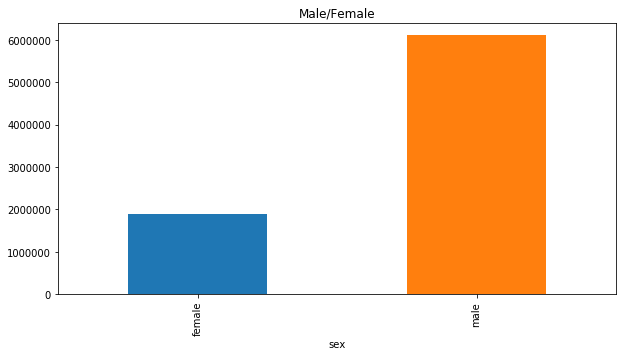

In [11]:
#male vs female suicide comparison
print(dataset.groupby('sex')['suicides_no'].sum())
dataset.groupby('sex')['suicides_no'].sum().plot.bar(figsize=(10,5),title = "Male/Female")

age
15-24 years     975700.0
25-34 years    1360780.0
35-54 years    2887740.0
5-14 years       62320.0
55-74 years    1955150.0
75+ years       756777.0
Name: suicides_no, dtype: float64


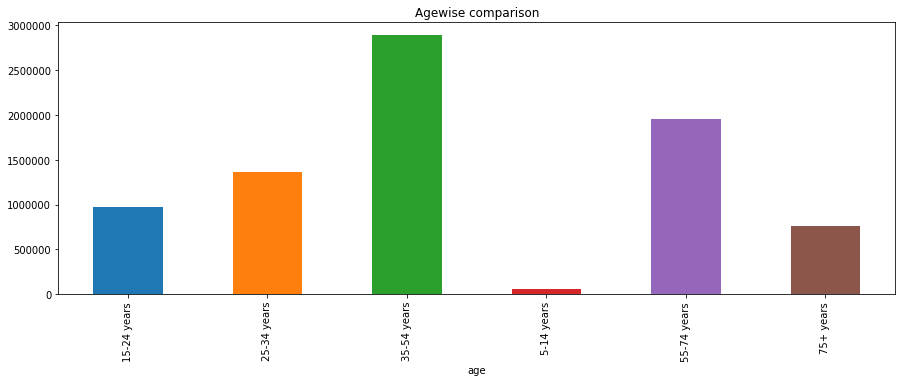

In [13]:
#Age wise Comparison
print(dataset.groupby('age')['suicides_no'].sum())
dataset.groupby('age')['suicides_no'].sum().sort_index().plot.bar(figsize=(15,5),title = "Agewise comparison")

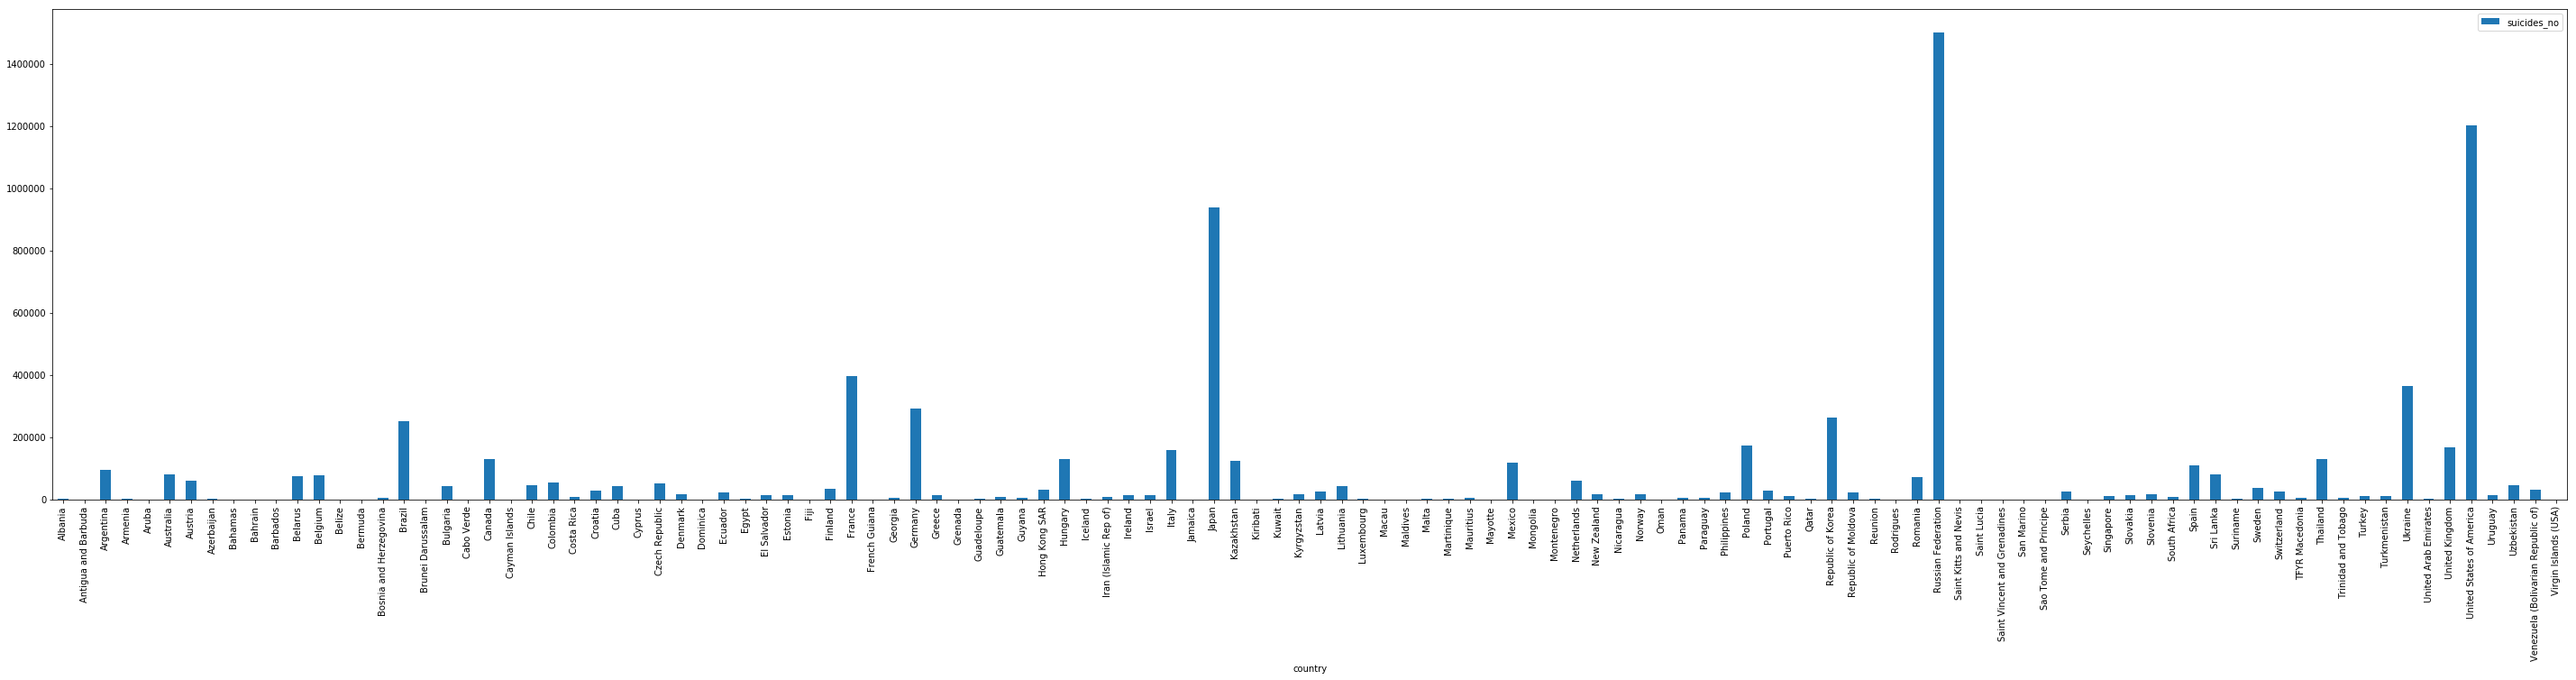

In [14]:
dataset[['country','suicides_no']].groupby(['country']).sum().plot(kind='bar',figsize=(50,10),label="Total Suicies Per country in following Year")

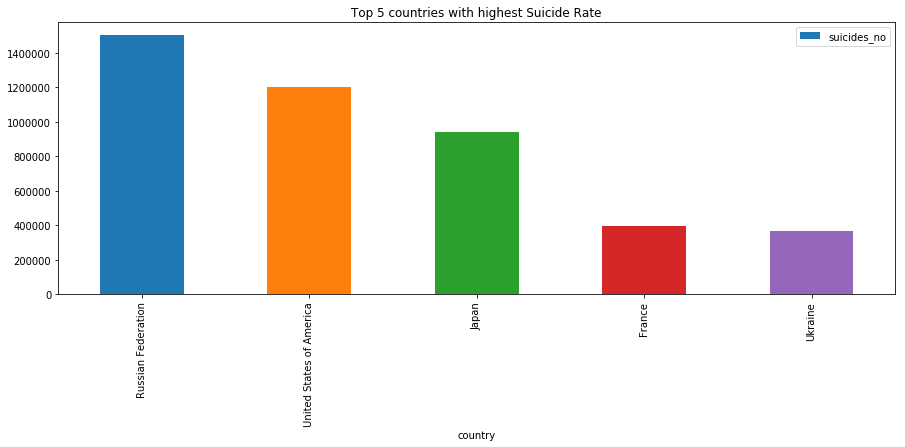

In [15]:
#checking top 5 countries highest suicide rate.
c_suicides=dataset[['country','suicides_no']].groupby(['country']).sum()
c_suicides = c_suicides.reset_index().sort_values(by='suicides_no', ascending=False)
top_5 = c_suicides[:5]
top_5.plot(kind='bar',figsize=(15,5),title="Top 5 countries with highest Suicide Rate",x='country',y='suicides_no')

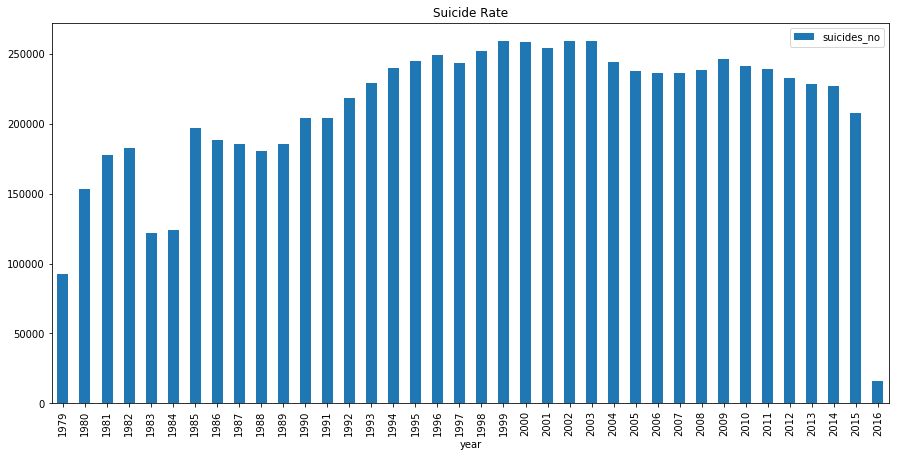

In [16]:
#Checking total number of suicides per year
dataset[['year','suicides_no']].groupby(['year']).sum().plot(kind='bar',figsize=(15,7),title="Suicide Rate")

In [18]:
#Preprocessing, Converting AGE Groups into integer values and Gender ~ Female=0,Male=1 for model testing and predictions
mydata=dataset
mydata=mydata.drop(['country'],axis=1)#removed country column from 'mydata'
#replacing age groups with integer values
mydata['age']=mydata['age'].replace('5-14 years',0)
mydata['age']=mydata['age'].replace('15-24 years',1)
mydata['age']=mydata['age'].replace('25-34 years',2)
mydata['age']=mydata['age'].replace('35-54 years',3)
mydata['age']=mydata['age'].replace('55-74 years',4)
mydata['age']=mydata['age'].replace('75+ years',5)
mydata['sex']=mydata['sex'].replace('female',0)
mydata['sex']=mydata['sex'].replace('male',1)

#adding two more columns for model training and testing

mydata['suicides/100k_population']=(mydata.suicides_no/mydata.population)/100000
mydata['fatality_rate']=nump.where(mydata['suicides/100k_population']>mydata['suicides/100k_population'].mean(),0,1)





In [19]:
#Dividing dataset into training and testing sets
X = nump.array(mydata.drop(['fatality_rate', 'suicides/100k_population'], 1))
y=nump.array(mydata.fatality_rate)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

from sklearn import utils
from sklearn import preprocessing
from sklearn import metrics
#Encoing labels for continous and multi class output
label_enc=preprocessing.LabelEncoder()
trs=label_enc.fit_transform(y_train)


print("Shape of x_train: ",X_train.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of x_test: ",X_test.shape)
print("Shape of y_test: ",y_test.shape)



Shape of x_train:  (27045, 5)
Shape of y_train:  (27045,)
Shape of x_test:  (9015, 5)
Shape of y_test:  (9015,)


In [20]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
print('Logistic Regression : {:.3f}'.format(accuracy_score(y_test,logreg.predict(X_test))))

Logistic Regression : 0.878


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [21]:
#Checking DecisionTreeClassifier Model and its accuracy
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(X_train,trs)
model.predict(X_test)

print('Decision Tree ',accuracy_score(y_test,model.predict(X_test)))

Decision Tree  0.9919023849140322


In [22]:
#checking RandomForestClassifier Model and accuracy
from sklearn.ensemble import RandomForestClassifier
mod=RandomForestClassifier(n_estimators=100,random_state=42)
mod.fit(X_train,trs)
mod.predict(X_test)
print("Random Forest accuracy is: ",accuracy_score(y_test,mod.predict(X_test)))

Random Forest accuracy is:  0.9904603438713255


In [23]:
from sklearn.metrics import classification_report
print(classification_report(logreg.predict(X_test),y_test))

              precision    recall  f1-score   support

           0       0.61      1.00      0.76      1708
           1       1.00      0.85      0.92      7307

   micro avg       0.88      0.88      0.88      9015
   macro avg       0.80      0.92      0.84      9015
weighted avg       0.93      0.88      0.89      9015



In [25]:
#classification report DecisionTreeClassifier

print(classification_report(mod.predict(X_test),y_test))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2789
           1       0.99      0.99      0.99      6226

   micro avg       0.99      0.99      0.99      9015
   macro avg       0.99      0.99      0.99      9015
weighted avg       0.99      0.99      0.99      9015



In [26]:
#classification report RandomForest

print(classification_report(model.predict(X_test),y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2788
           1       0.99      0.99      0.99      6227

   micro avg       0.99      0.99      0.99      9015
   macro avg       0.99      0.99      0.99      9015
weighted avg       0.99      0.99      0.99      9015

